#                                                Diamond Price

In [204]:
%%html
<img src='GetImage-697.jpeg', width=900, hight=2000>

# Data Overview

price: price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond color, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of the top of diamond relative to widest point (43--95)

In [208]:
%%html
<img src='diamond-table-and-depth.jpg', width=500, hight=2000>

# import libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Read and Describe data

In [100]:
train = pd.read_csv('train.csv')

In [101]:
train.head(10)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87
6,7,0.71,Very Good,F,VS1,61.8,60.0,3017,5.66,5.70,3.51
7,8,0.70,Ideal,F,SI1,61.3,57.0,2288,5.72,5.77,3.52
8,9,0.59,Ideal,D,VS1,60.9,56.0,2175,5.39,5.44,3.30
9,10,0.31,Very Good,G,VVS1,59.8,62.0,761,4.35,4.41,2.62


In [102]:
train.tail(10)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
43142,43143,0.55,Ideal,D,SI1,60.6,56.0,1692,5.27,5.32,3.21
43143,43144,0.38,Ideal,J,VS1,62.0,53.0,645,4.66,4.70,2.90
43144,43145,1.20,Premium,F,SI2,59.9,58.0,6055,6.96,6.90,4.15
43145,43146,0.51,Ideal,F,SI2,61.1,56.0,1139,5.18,5.21,3.17
43146,43147,1.11,Very Good,D,SI2,61.3,60.0,5042,6.54,6.60,4.03
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,43152,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [104]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data cleaning

In [105]:
train.drop('Id', inplace=True, axis=1)

In [106]:
train.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [120]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No missing value

In [108]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values of 'x', 'y' and 'z' are zero. Since a diamond cannot have a dimension equal to zero, this means there are incorrect values in the data

In [109]:
train = train.drop(train[train["x"]==0].index)
train = train.drop(train[train["y"]==0].index)
train = train.drop(train[train["z"]==0].index)

In [110]:
train.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


'y' and 'z' have some outliers that need to be removed

In [111]:
train = train[(train['y']<30)]
train = train[(train['z']<30)]

In [112]:
train.describe()

,carat,depth,table,price,x,y,z
count,43132.000000,43132.000000,43132.000000,43132.000000,43132.00000,43132.000000,43132.000000
mean,0.797564,61.747450,57.458057,3927.565010,5.73173,5.733247,3.539166
std,0.473302,1.435075,2.233407,3983.241903,1.11931,1.111318,0.691265
min,0.200000,43.000000,43.000000,326.000000,3.73000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.71000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.70000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.54000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.74000,10.540000,6.980000


# Data distribution

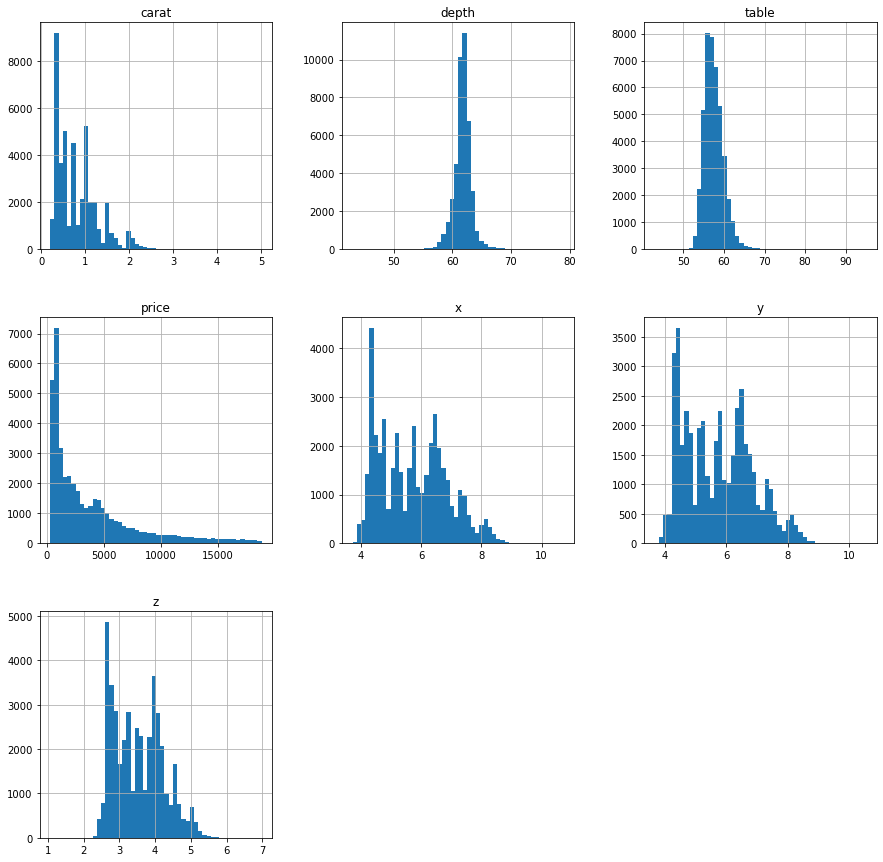

In [113]:
train.hist(figsize=(15,15), bins=50)
plt.show()

# data correlation

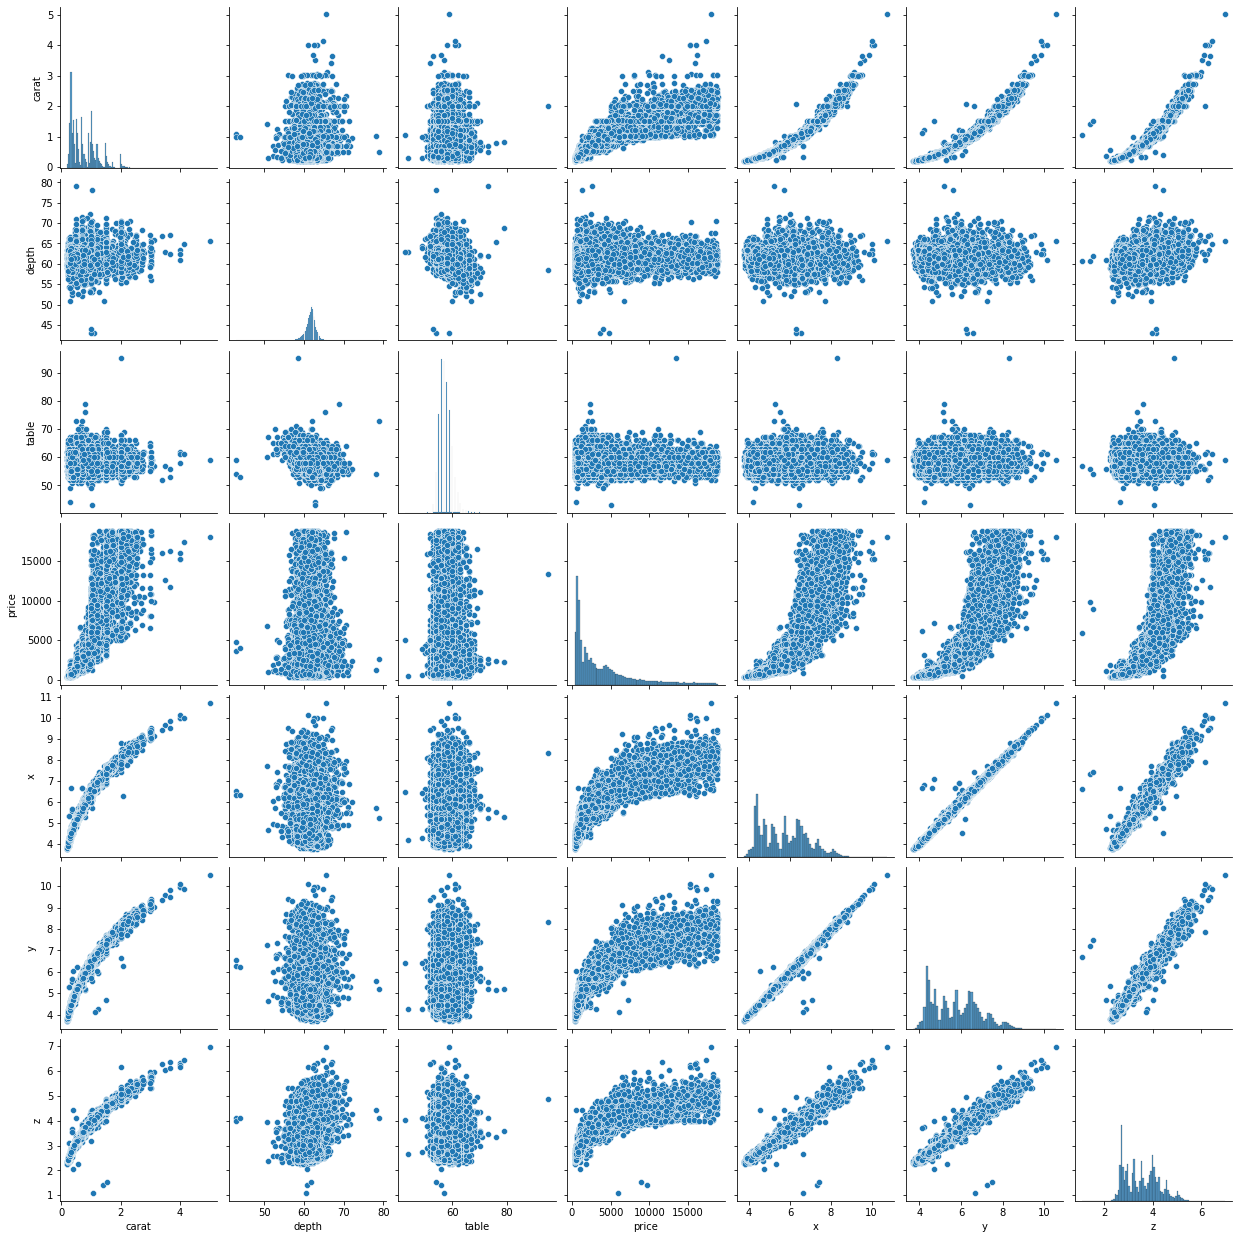

In [115]:
sns.pairplot(train)
plt.show()

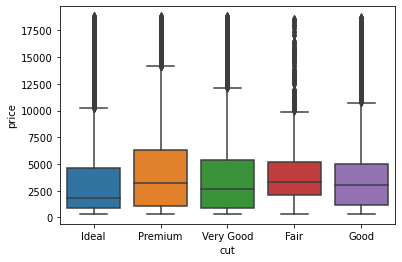

In [116]:
sns.boxplot(x='cut', y='price', data=train)
plt.show()

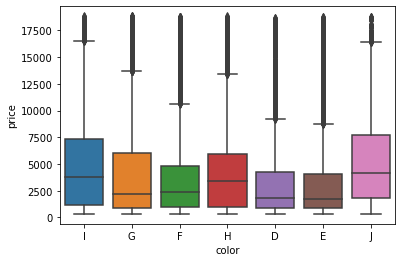

In [59]:
sns.boxplot(x='color', y='price', data=train)
plt.show()

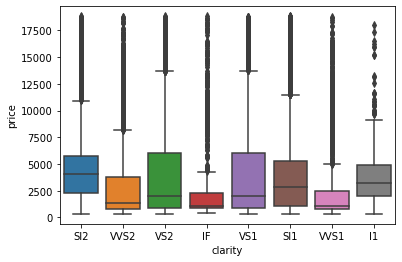

In [60]:
sns.boxplot(x='clarity', y='price', data=train)
plt.show()

There are a relationship between both the price and the [cara, x, y, z, cut, color, clarity].

# Select Target and features

In [176]:
X_train = train.drop(['price', 'x', 'y', 'z'],axis=1)
y_train = train["price"]

In [177]:
categ_attributes = ["cut","color","clarity"]
num_attributes = list(X_train.drop(categ_attributes,axis=1))

In [178]:
categ_attributes

['cut', 'color', 'clarity']

In [179]:
num_attributes

['carat', 'depth', 'table']

# Building model

In [180]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

Impute missing values with the median and Scale the data

In [181]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attributes),
 ("cat", OneHotEncoder(), categ_attributes),
 ])

y_train_prepared = full_pipeline.fit_transform(X_train)

1- The OneHotEncoder is a transformer that converts categorical data into numerical data.

2- The y_train_prepared data frame contains the transformed data.

In [182]:
dec_tree_pipe = Pipeline([("scaler1",StandardScaler(with_mean=False)),
                     ("DecisionTree",DecisionTreeRegressor())])


ranfor_pipe = Pipeline([("scalar2",StandardScaler(with_mean=False)),
                     ("RandomForest",RandomForestRegressor())])


gbr_pipe = Pipeline([
    ('scaler3', StandardScaler(with_mean=False)),
    ('gbr',  GradientBoostingRegressor())
])

creates three pipelines for regression. The pipelines are used to prepare data for three different regression models: 

DecisionTreeRegressor 

RandomForestRegressor 

GradientBoostingRegressor 

In [183]:
pipelines = [dec_tree_pipe, ranfor_pipe, gbr_pipe]

for pipe in pipelines:
    pipe.fit(y_train_prepared, y_train)

The models are fit to the y_train_prepared data, which is the prepared training data.

In [184]:
cv_results_rms = []
for model in pipelines:
    cv_score = cross_val_score(model, y_train_prepared,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score) 

calculates the root mean squared error (RMSE) of three regression models using cross-validation. 

In [185]:
print("DecisionTree: ",cv_results_rms[0].mean())
print("RandomForest: ",cv_results_rms[1].mean())
print("gbr: ",cv_results_rms[2].mean())

DecisionTree:  -721.6757068036007
RandomForest:  -552.832418303475
gbr:  -733.7181913837192


We have built multiple models and then calculated the mean_squared_error for each one to decide which program to choose

# Testing the model

In [186]:
test = pd.read_csv('test.csv')

In [187]:
Id = test['Id']
test.drop('Id',axis=1,inplace=True)

In [188]:
test_prepared = full_pipeline.fit_transform(test)

In [189]:
pred = ranfor_pipe.predict(test_prepared)
data = {'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)